# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/extracurricular/YBIGTA/230713 통계기초 회귀분석+EDA FE/airbnb_listings.csv', index_col=0)

<ipython-input-2-963cd1bba887>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/extracurricular/YBIGTA/230713 통계기초 회귀분석+EDA FE/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [121]:
# Q1
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(50796, 54)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [122]:
# Q2

#df.info()
#df.isnull().sum()
#df_ = df.isnull().sum().query('counts > 0')
df_ = df.isnull().sum().to_frame(name='counts').query('counts > 0')
df_

,counts
host_response_time,19006
host_response_rate,19006
host_acceptance_rate,14015
host_is_superhost,5
host_listings_count,5
host_total_listings_count,5
host_has_profile_pic,5
host_identity_verified,5
bathrooms,54
bedrooms,77


In [123]:
#Q2
df_.sort_values(by="counts", ascending=False)

,counts
jurisdiction_names,50781
license,50759
square_feet,50407
monthly_price,46119
weekly_price,45411
host_response_rate,19006
host_response_time,19006
security_deposit,17325
host_acceptance_rate,14015
review_scores_value,11482


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

host_response_time             0.37
host_response_rate             0.37
host_acceptance_rate           0.28
host_is_superhost              0.00
host_listings_count            0.00
host_total_listings_count      0.00
host_has_profile_pic           0.00
host_identity_verified         0.00
bathrooms                      0.00
bedrooms                       0.00
beds                           0.01
square_feet                    0.99
weekly_price                   0.89
monthly_price                  0.91
security_deposit               0.34
review_scores_rating           0.23
review_scores_accuracy         0.23
review_scores_cleanliness      0.23
review_scores_checkin          0.23
review_scores_communication    0.23
review_scores_location         0.23
review_scores_value            0.23
license                        1.00
jurisdiction_names             1.00
reviews_per_month              0.21
dtype: float64


<Axes: >

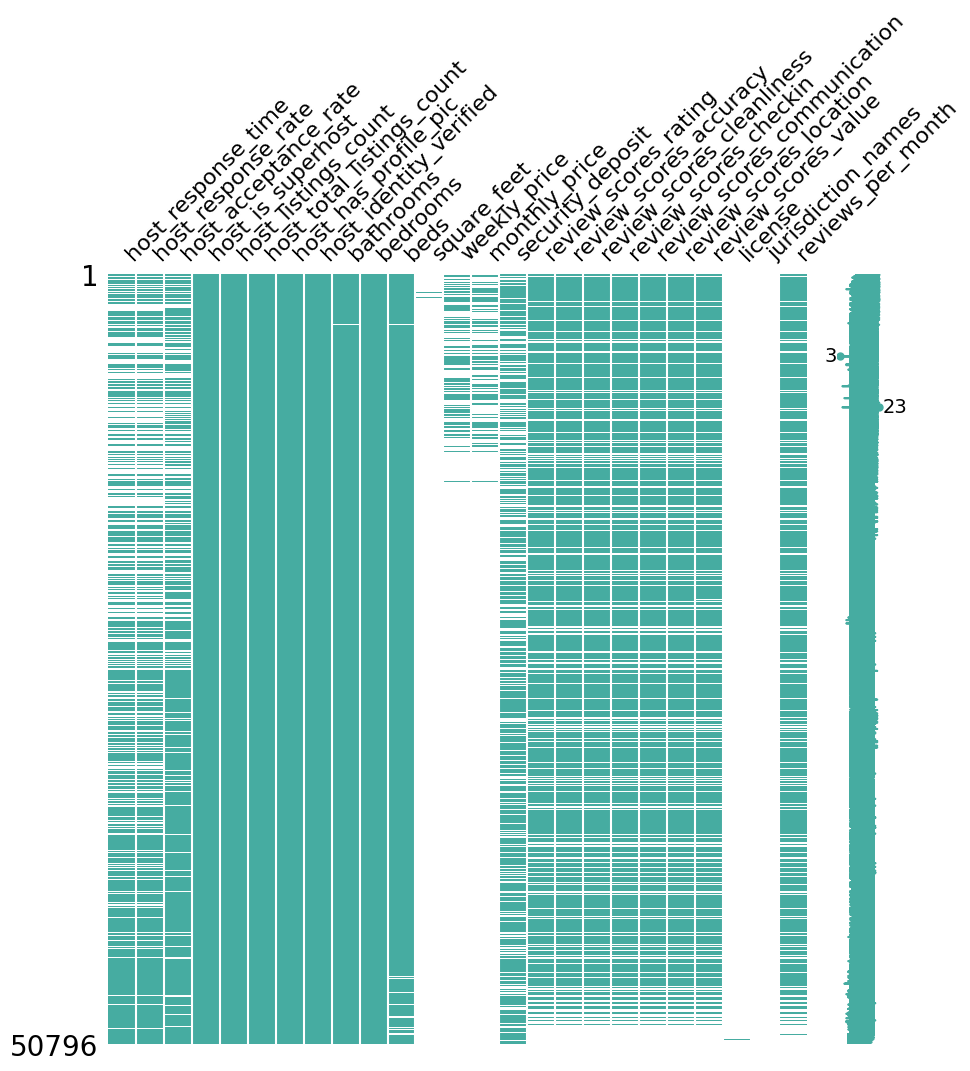

In [124]:
df_count  = df.loc[:, df.isnull().any()]
#df_count.drop(columns = df.columns[df.isnull().sum() == 0], axis = 1)
print((df_count.isnull().sum()/len(df_count)).round(2))

import missingno as msno

msno.matrix(df=df_count, figsize=(10, 10), color=(70/255, 172/255, 161/255))

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [125]:
# Q4
pd.set_option('display.max_columns', None)
df[df['beds'].isnull()==True].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [3]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [4]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

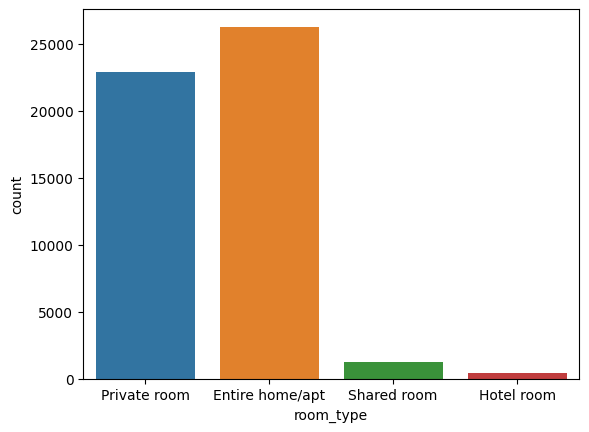

In [6]:
# Q5
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: xlabel='room_type', ylabel='bedrooms'>

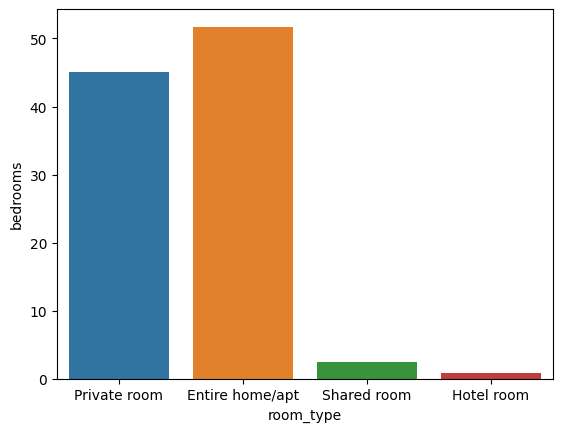

In [7]:
# Q6
sns.barplot(x = 'room_type', y = 'bedrooms', data = df, estimator=lambda x: len(x) / len(df) * 100)
#sns.barplot(x = 'room_type', y = 'bedrooms',stat = 'percent', data = df)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

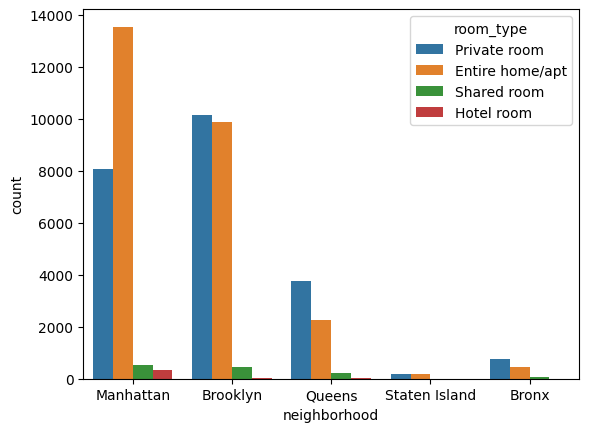

In [8]:
# Q7
sns.countplot(x = 'neighborhood', data = df, hue = 'room_type')


- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

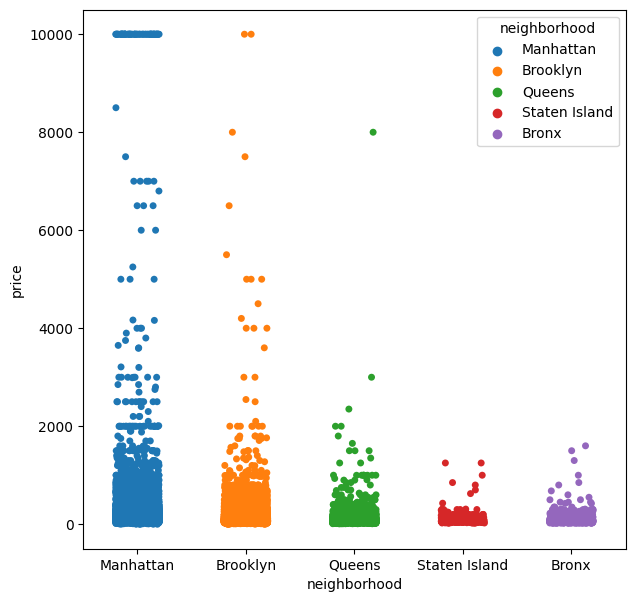

In [150]:
# Q8
plt.figure(figsize = (7, 7)) #여기부턴 직접 사이즈 조절해보세요
sns.stripplot(x = 'neighborhood', y = 'price', data = df, jitter = 0.2, hue = 'neighborhood')


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9

#방이 더 많은 지역일수록 가격이 더 높은 경향이 있다. 그리고 entire home/apt가 많은 지역일수록 방의 가격이 더 높다.
#이는 entire home/apt의 비율이 높은 맨해튼이나 브루클린 지역의 가격이 높은 것을 통해 확인할 수 있다.
#맨해튼이나 브루클린은 entire home/apt의 비율이 높고 가격도 높은 것으로 보아 다인의 여행객이 자주 오는 곳이라고 판단된다.
#지역별 가격 분포 그래프의 업다운이 지역별 room type 업다운과 비슷한 것으로 보아, 전반적인 가격에 영향을 끼치는 것은 private room이나 entire home/apt의 유무이다

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

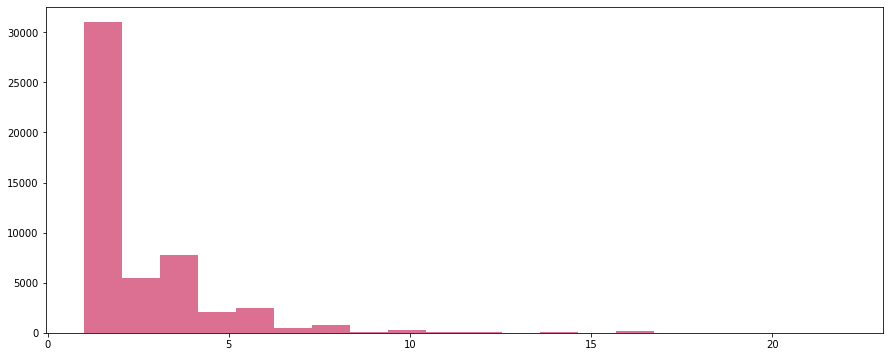

In [ ]:
# Q10


<Axes: xlabel='accommodates', ylabel='Count'>

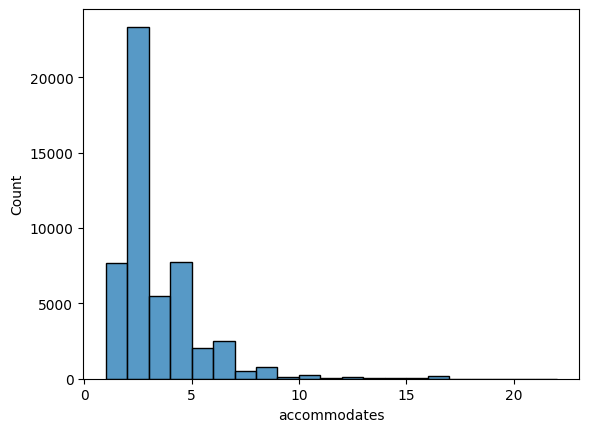

In [163]:
sns.histplot(x=df['accommodates'], binwidth = 1 )

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

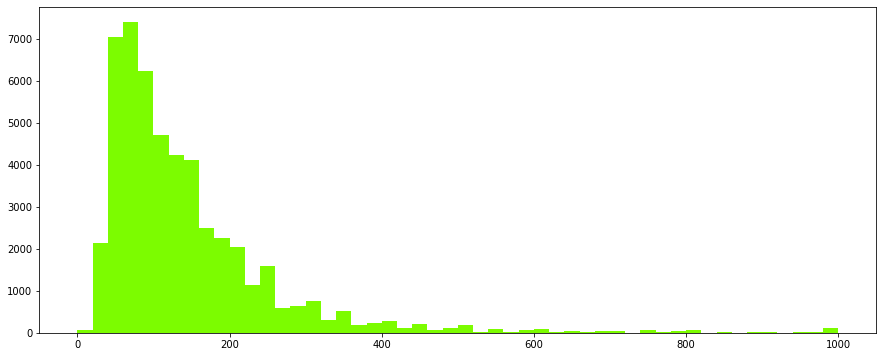

In [ ]:
# Q11



(0.0, 1000.0)

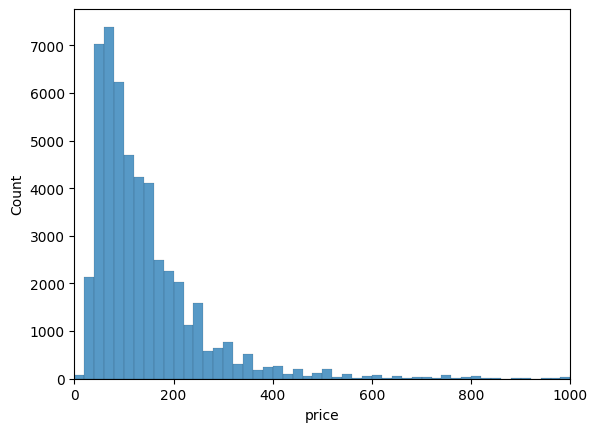

In [166]:
sns.histplot(x=df['price'], binwidth = 20 )
plt.xlim(0, 1000)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [10]:
df = pd.read_csv('/content/drive/MyDrive/extracurricular/YBIGTA/230713 통계기초 회귀분석+EDA FE/airbnb_listings.csv', index_col=0)

<ipython-input-10-963cd1bba887>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/extracurricular/YBIGTA/230713 통계기초 회귀분석+EDA FE/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [11]:
#Q12
df_copy = df.copy()
for i in df.columns:
    if (df[i].isna().sum()/len(df[i]))<0.10 and df[i].dtypes != object:
        df_copy[i].fillna(df[i].median())
df_copy.drop(columns = df.columns[df.isna().sum()/len(df) >= 0.25], axis = 1)
df_copy.dropna(axis=0, how = 'any', subset = df.columns[(df.isna().sum()/len(df) < 0.25) & (df.isna().sum()/len(df) >= 0.10)], inplace = True)


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [30]:
#Q13-1)

df_copy['price'].quantile([0.25, 0.5, 0.75])

priciness = []
for a in df_copy['price']:
    if (a < 69):
        priciness.append('$')
    elif (69 <= a < 105):
        priciness.append('$$')
    elif (105 <= a <= 175):
        priciness.append('$$')
    else:
        priciness.append('$$$$')

df_copy['priciness'] = priciness
df_copy.head()

#구글맵 식당 정보처럼, 특정 에어비앤비의 상대적인 가격대를 달러 표시의 갯수로 한눈에 확인할 수 있도록 함


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,priciness
1,2595,within a day,87,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38,$$$$
2,3831,within an hour,83,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,f,NaN,NaN,f,f,moderate,f,f,4.71,$$
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,f,NaN,NaN,f,f,moderate,t,t,0.59,$$$$
4,5114,within a day,50,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56,$$
5,5121,NaN,NaN,67%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.38,$


In [ ]:
'''
df_copy['host_response_rate'] = df_copy['host_response_rate'].str.replace('%', '')

response_rate = []
for i in df_copy.shape[0]:
    if (int(df_copy['host_response_rate'][i]) < 33):
        response_rate('low')
    elif (33 <= int(df_copy['host_response_rate'][i]) <= 66):
        response_rate('young')
    else:
        response_rate.append('high')

df_copy['response_rate'] = response_rate
'''

In [20]:
#Q13-2)


df_copy['amenities'] = df_copy['amenities'].str.replace('\{', '')
df_copy['amenities'] = df_copy['amenities'].str.replace('\}', '')
df_copy['amenities'] = df_copy['amenities'].str.replace('\"', '')
df_copy['amenities'].str.split(',',expand=True)


pd.get_dummies(df_copy['amenities'])

#어메니티 목록을 feature split으로 나누어서, 나중에 '특정 어매니티를 가진 에어비앤비' '몇 개 이상의 어매니티를 가진 에어비앤비' 등의 search/sort에 유용하도록 encoding을 하려고 했으나... 데이터프레임 전체를 재배열해야 한다는 것을 깨달았습니다


<ipython-input-20-a4af81188a89>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['amenities'] = df_copy['amenities'].str.replace('\{', '')
<ipython-input-20-a4af81188a89>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['amenities'] = df_copy['amenities'].str.replace('\}', '')


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
1,TV,Wifi,Air conditioning,Kitchen,Paid parking off premises,Free street parking,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,...,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wifi,Air conditioning,Kitchen,Pets allowed,Free street parking,Heating,Family/kid friendly,...,None,None,None,None,None,None,None,None,None,None
3,TV,Cable TV,Internet,Wifi,Air conditioning,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,...,None,None,None,None,None,None,None,None,None,None
4,TV,Internet,Wifi,Air conditioning,Kitchen,Elevator,Buzzer/wireless intercom,Heating,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
5,Wifi,Air conditioning,Kitchen,Pets live on this property,Cat(s),Heating,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,Wifi,Air conditioning,Kitchen,Free street parking,Hot tub,Heating,Smoke detector,Fire extinguisher,Essentials,Shampoo,...,None,None,None,None,None,None,None,None,None,None
50526,Wifi,Kitchen,Smoking allowed,Smoke detector,Carbon monoxide detector,First aid kit,Fire extinguisher,Essentials,Lock on bedroom door,Private living room,...,None,None,None,None,None,None,None,None,None,None
50598,Wifi,Air conditioning,Kitchen,Heating,Smoke detector,Carbon monoxide detector,First aid kit,Fire extinguisher,Essentials,Shampoo,...,None,None,None,None,None,None,None,None,None,None
50650,TV,Wifi,Air conditioning,Kitchen,Heating,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,Lock on bedroom door,...,None,None,None,None,None,None,None,None,None,None


In [34]:
#Q13-3)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()

sd_scaler = sd_scaler.fit_transform(df_copy['price'].values.reshape(-1,1))
df_copy['sd_scaled_price'] = sd_scaler
df_copy.head()

#추후 새로운 에어비앤비가 등록될 때, 그 새로운 에어비앤비의 정보를 기반으로 가격을 예측하거나 대신 측정해주는 서비스를 도입할 수 있음. 이러한 서비스를 위해 scaling으로 전처리를 해줄 수 있

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,priciness,sd_scaled_price
1,2595,within a day,87,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38,$$$$,0.203301
2,3831,within an hour,83,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,NaN,NaN,f,f,moderate,f,f,4.71,$$,-0.176956
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,NaN,NaN,f,f,moderate,t,t,0.59,$$$$,0.133401
4,5114,within a day,50,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56,$$,-0.162976
5,5121,NaN,NaN,67%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.38,$,-0.258040


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>



```
# 코드로 형식 지정됨
```

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
